<a href="https://colab.research.google.com/github/TaniaZharova2205/HSE/blob/main/Seminar_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Продолжаем анализировать датасет:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arl20/python_2024_AI/refs/heads/main/datasets/flats.csv')

Цель - спрогнозировать цену квартиру, используя другие факторы.

### Часть 1. Проверяем пропуски, ошибки, выбросы

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df.head()

Price Apartment type Metro station  Minutes to metro         Region  \
0  6,300,000.00      Secondary       Опалиха              6.00  Moscow region   
1  9,000,000.00      Secondary       Павшино              2.00  Moscow region   
2 11,090,000.00      Secondary      Мякинино             14.00  Moscow region   
3  8,300,000.00      Secondary      Строгино              8.00  Moscow region   
4  6,450,000.00      Secondary       Опалиха              6.00  Moscow region   

   Number of rooms  Area  Living area  Kitchen area  Floor  Number of floors  \
0             1.00 30.60        11.10          8.50  25.00                25   
1             1.00 49.20        20.00         10.00   6.00                15   
2             1.00 44.70        16.20         13.10  10.00                25   
3             1.00 35.10        16.00         11.00  12.00                33   
4             1.00 37.70        15.20          4.00   5.00                 5   

                  Renovation  
0                   Cosmetic  
1  European-style renovation  
2                   Cosmetic  
3  European-style renovation  
4         Without renovation

In [ ]:
df.describe()

Price  Minutes to metro  Number of rooms      Area  \
count        22,676.00         22,676.00        22,676.00 22,676.00   
mean     36,121,321.82             11.89             2.04     71.97   
std      82,825,614.18              6.20             1.52     68.37   
min       1,150,000.00              0.00             0.00      6.00   
25%       7,068,116.00              7.00             1.00     37.40   
50%      11,343,200.00             11.00             2.00     53.30   
75%      24,799,247.50             15.00             3.00     77.14   
max   2,455,020,000.00             60.00            12.00  1,117.00   

       Living area  Kitchen area     Floor  Number of floors  
count    22,676.00     22,676.00 22,676.00         22,676.00  
mean         38.52         12.59      9.19             16.56  
std          38.12          7.73      7.55              9.78  
min           2.00          1.00      1.00              1.00  
25%          17.60          8.60      4.00             11.00  
50%          28.50         10.60      8.00             16.00  
75%          43.20         14.50     13.00             20.00  
max         566.80        122.00     92.00             97.00

Возможные проблемы:
- нулевое количество комнат
- слишком маленькая площадь
- слишком маленькая цена

In [ ]:
df[(df['Area'] < df['Living area']) | (df['Area'] < df['Kitchen area'])].head()

Price Apartment type Metro station  Minutes to metro  Region  \
13027 1,150,000.00      Secondary    Покровское             32.00  Moscow   

       Number of rooms  Area  Living area  Kitchen area  Floor  \
13027             0.00  6.00         5.20          7.10   2.00   

       Number of floors          Renovation  
13027                18  Without renovation

In [ ]:
df = df[(df['Area'] >= df['Living area']) & (df['Area'] >= df['Kitchen area'])]

In [ ]:
df.describe()

Price  Minutes to metro  Number of rooms      Area  \
count        22,675.00         22,675.00        22,675.00 22,675.00   
mean     36,122,864.10             11.89             2.04     71.97   
std      82,827,114.98              6.20             1.52     68.37   
min       1,420,000.00              0.00             0.00      8.40   
25%       7,069,310.00              7.00             1.00     37.40   
50%      11,343,200.00             11.00             2.00     53.30   
75%      24,799,495.00             15.00             3.00     77.14   
max   2,455,020,000.00             60.00            12.00  1,117.00   

       Living area  Kitchen area     Floor  Number of floors  
count    22,675.00     22,675.00 22,675.00         22,675.00  
mean         38.52         12.59      9.19             16.56  
std          38.12          7.73      7.55              9.78  
min           2.00          1.00      1.00              1.00  
25%          17.60          8.60      4.00             11.00  
50%          28.50         10.60      8.00             16.00  
75%          43.20         14.50     13.00             20.00  
max         566.80        122.00     92.00             97.00

In [ ]:
df[df['Number of rooms'] == 0].head()

Price Apartment type        Metro station  Minutes to metro  \
1327 125,000,000.00      Secondary             Аэропорт             12.00   
1328 119,000,000.00      Secondary          Белорусская              6.00   
1329  42,000,000.00      Secondary          Белорусская              5.00   
1330  24,500,000.00      Secondary            Ростокино             11.00   
1331  16,300,000.00      Secondary   Народное Ополчение             19.00   

      Region  Number of rooms   Area  Living area  Kitchen area  Floor  \
1327  Moscow             0.00 135.30        70.50         17.80  37.00   
1328  Moscow             0.00 277.00       142.20         29.60   4.00   
1329  Moscow             0.00  91.00        48.10         14.20   5.00   
1330  Moscow             0.00 100.00        75.00         20.00   8.00   
1331  Moscow             0.00  37.30        21.00          9.70   2.00   

      Number of floors          Renovation  
1327                37  Without renovation  
1328                 6  Without renovation  
1329                 6  Without renovation  
1330                38  Without renovation  
1331                28  Without renovation

#### Типы данных

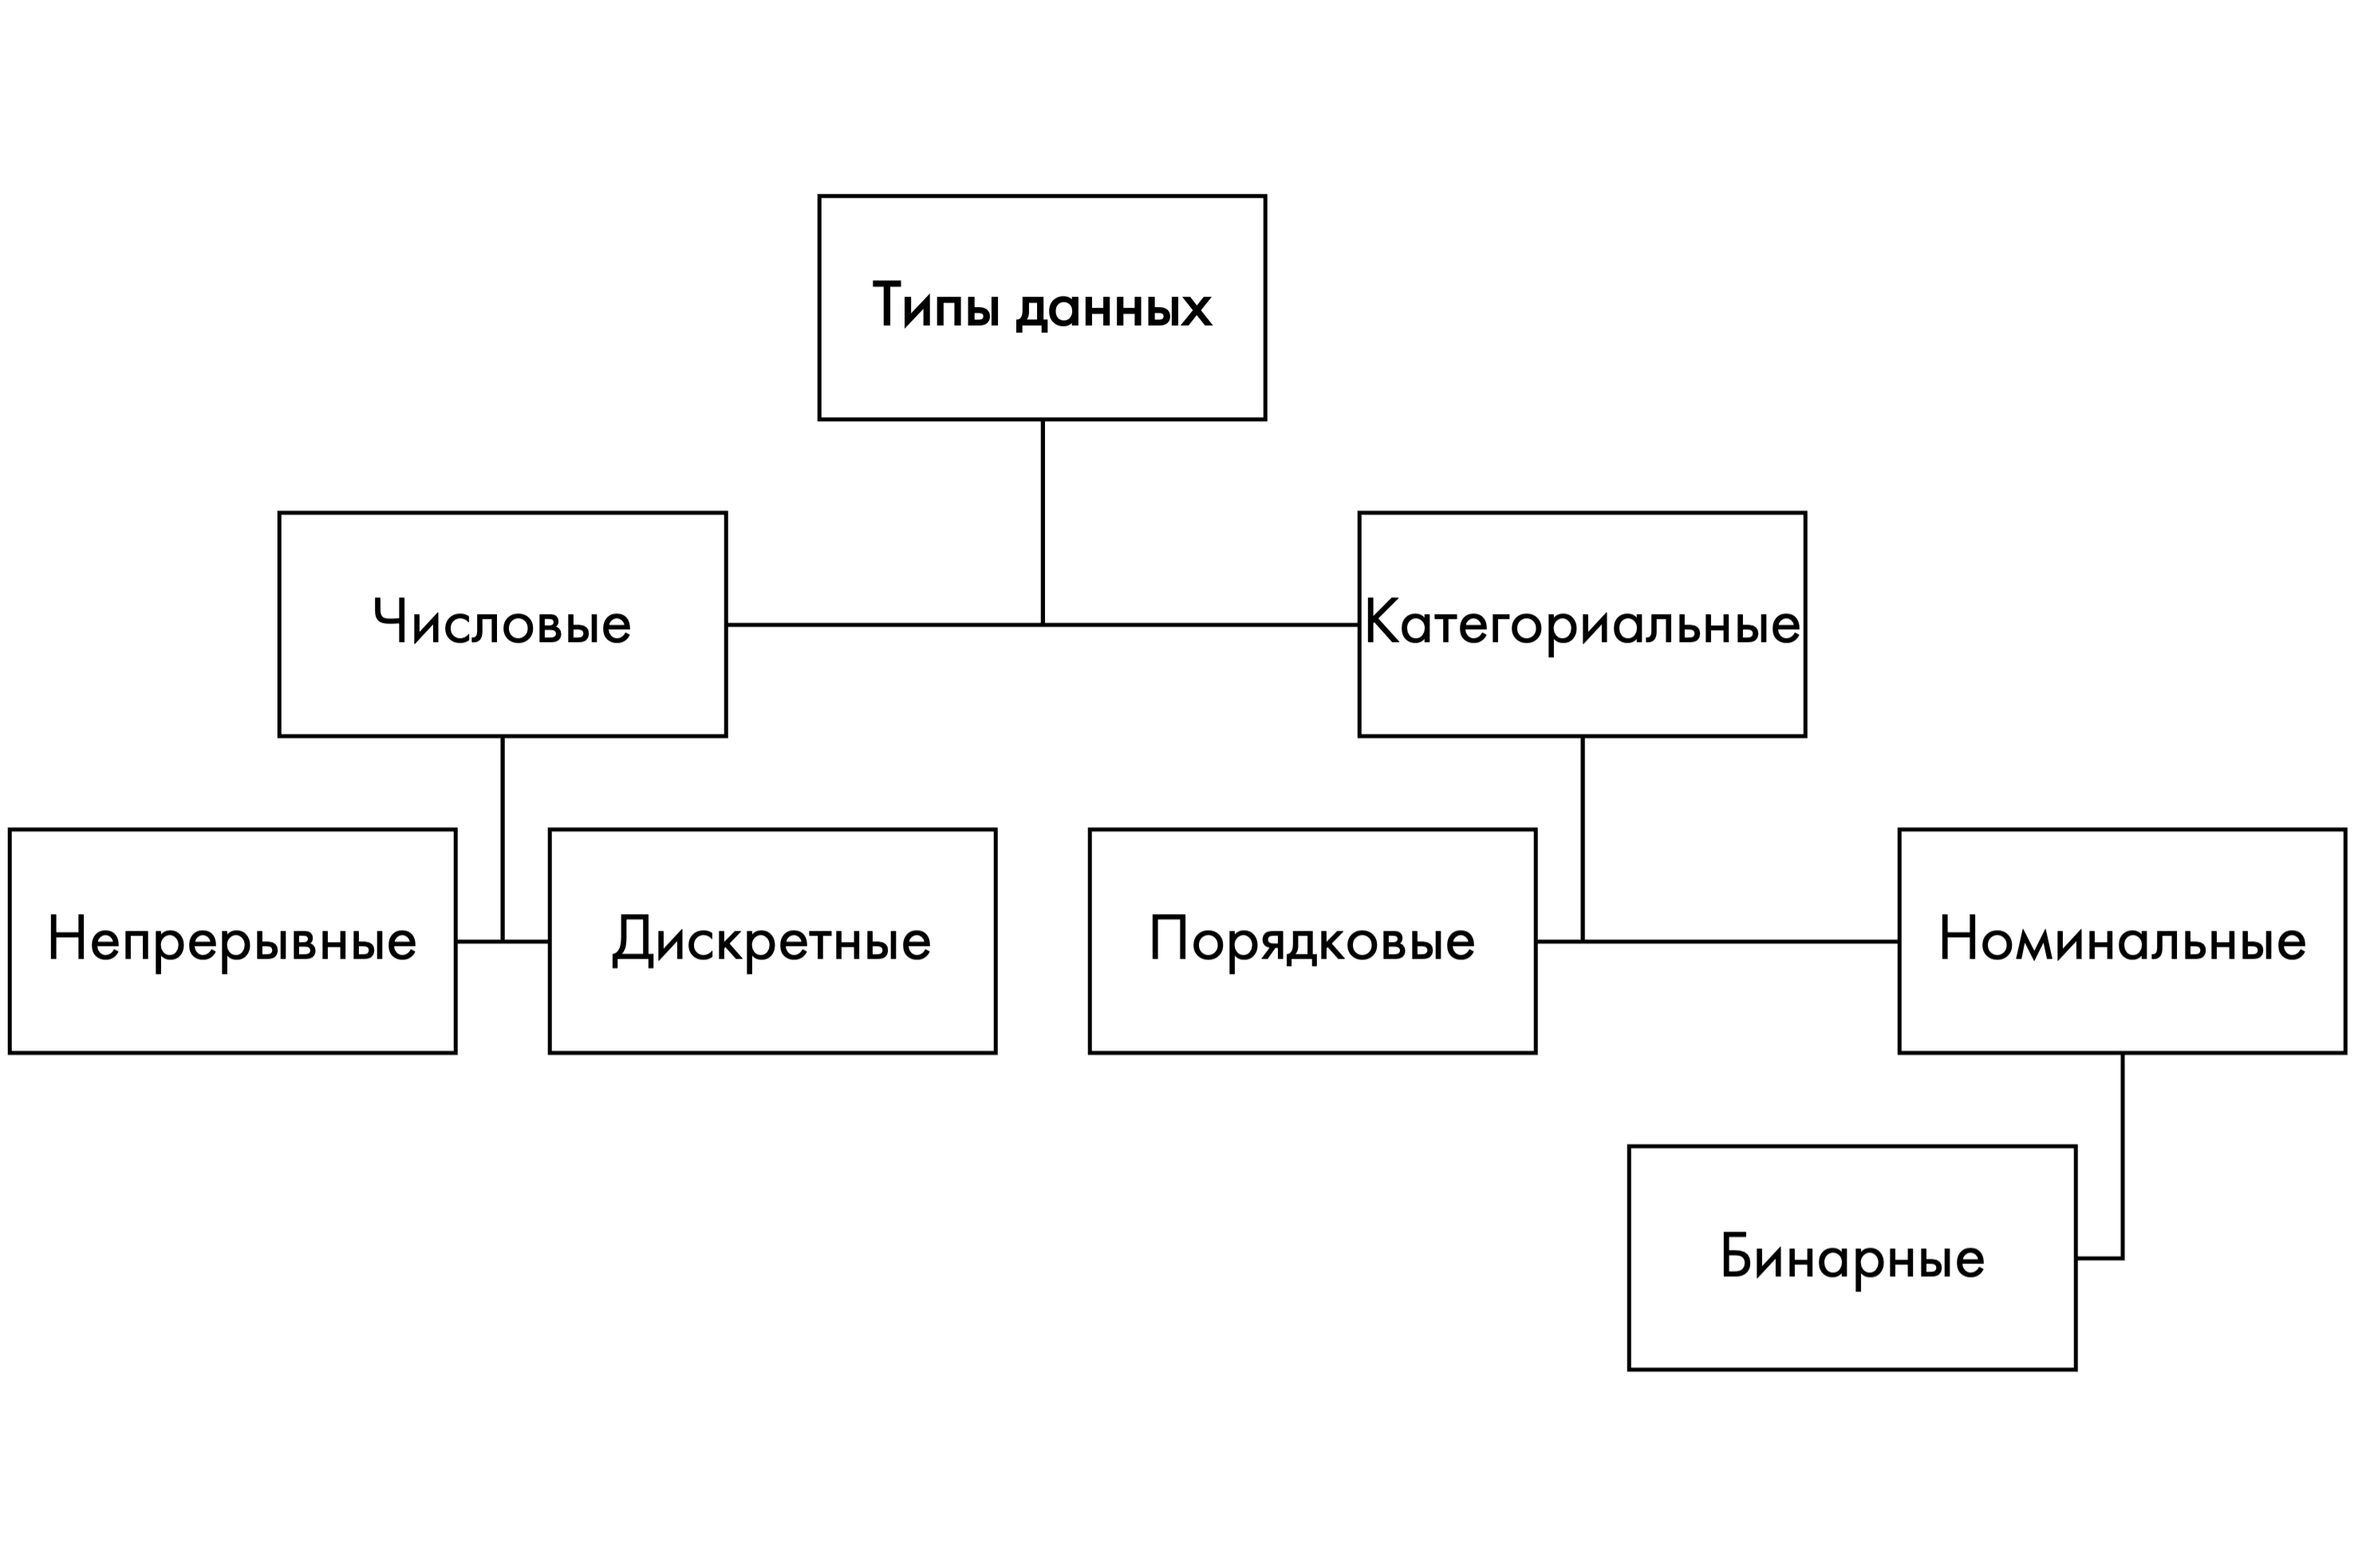


In [ ]:
df.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

Категориальные переменные: Region, Apartment type,	Metro station, Renovation

Количественные непрерывные: Price, Area,	Living area,	Kitchen area, Minutes to metro

Количественные дискретные: Number of rooms, Floor, Number of floors

In [ ]:
df['Number of rooms'] = df['Number of rooms'].astype(int)
df['Floor'] = df['Floor'].astype(int)
df['Number of floors'] = df['Number of floors'].astype(int)

### Часть 2. Визуализация данных

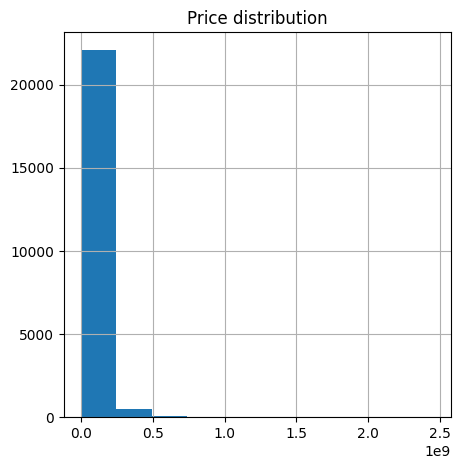

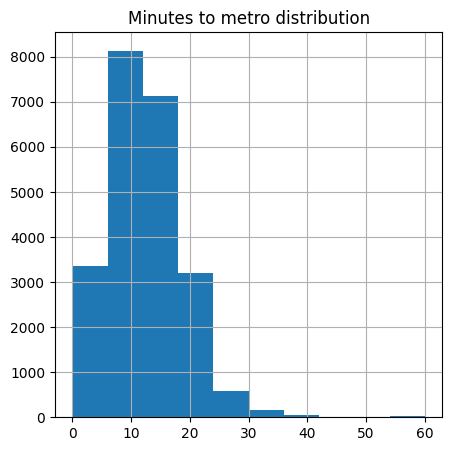

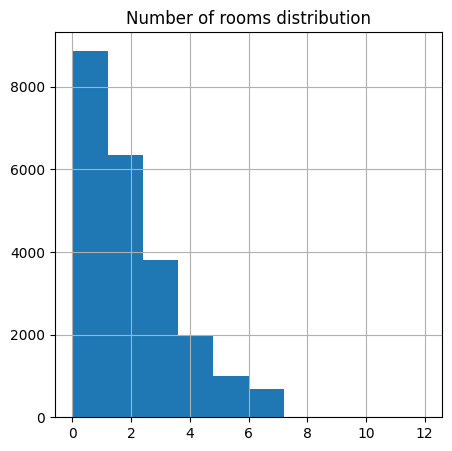

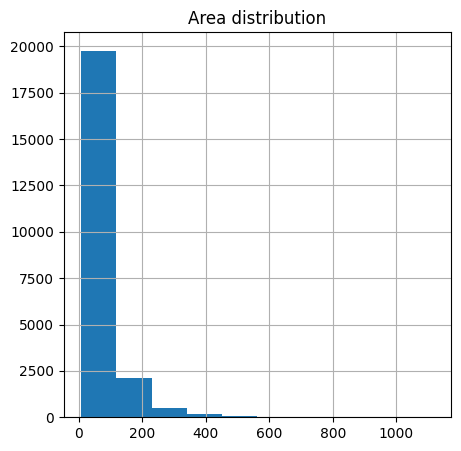

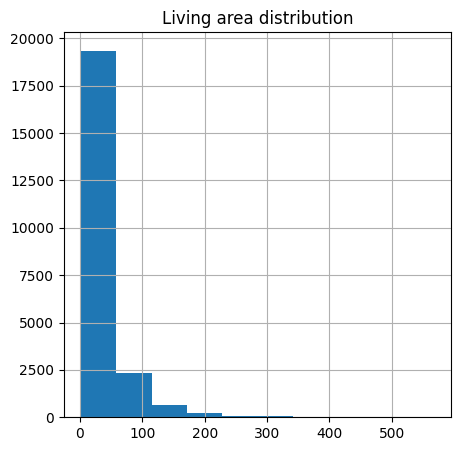

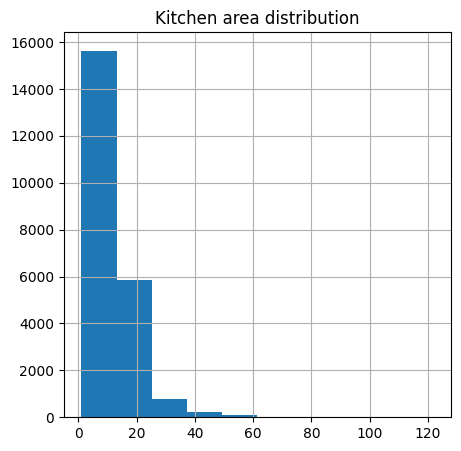

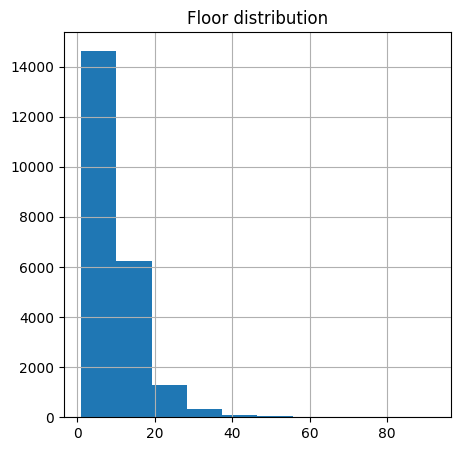

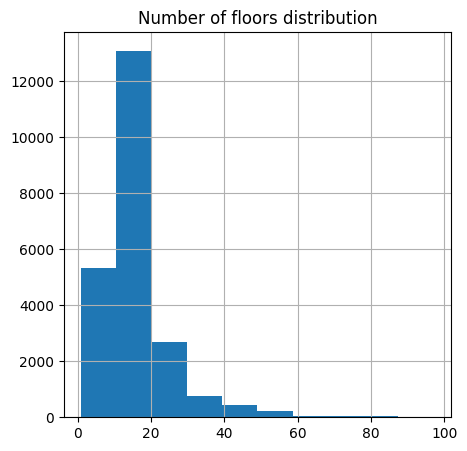

In [ ]:
numeric_cols = df.select_dtypes([int, float]).columns
for col in numeric_cols:
  plt.figure(figsize=(5, 5))
  plt.title(f'{col} distribution')
  df[col].hist()
  plt.show()

In [ ]:
from tqdm.auto import tqdm

In [ ]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [ ]:
axes.flatten()

array([<Axes: title={'center': 'Price distribution'}, xlabel='Price', ylabel='Frequency'>,
       <Axes: title={'center': 'Minutes to metro distribution'}, xlabel='Minutes to metro', ylabel='Frequency'>,
       <Axes: title={'center': 'Number of rooms distribution'}, xlabel='Number of rooms', ylabel='Frequency'>,
       <Axes: title={'center': 'Area distribution'}, xlabel='Area', ylabel='Frequency'>,
       <Axes: title={'center': 'Living area distribution'}, xlabel='Living area', ylabel='Frequency'>,
       <Axes: title={'center': 'Kitchen area distribution'}, xlabel='Kitchen area', ylabel='Frequency'>,
       <Axes: title={'center': 'Floor distribution'}, xlabel='Floor', ylabel='Frequency'>,
       <Axes: title={'center': 'Number of floors distribution'}, xlabel='Number of floors', ylabel='Frequency'>,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

0it [00:00, ?it/s]

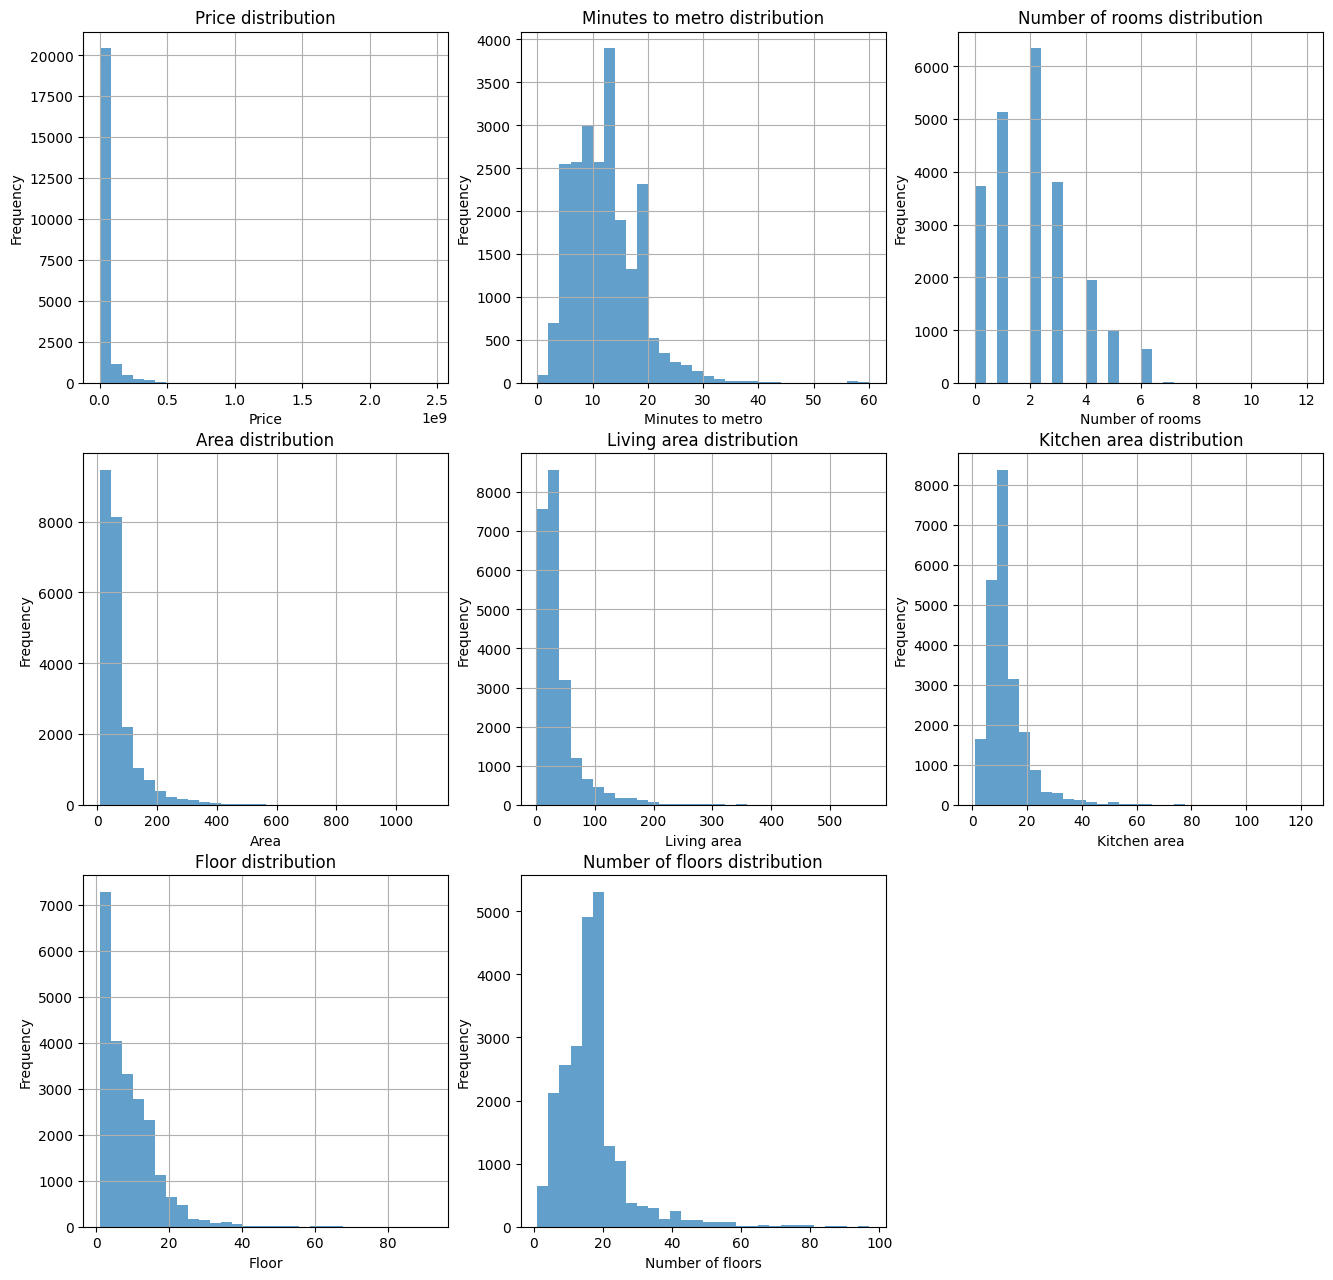

In [ ]:
numeric_cols = df.select_dtypes([int, float]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(16, (num_cols // 3 + 1) * 7))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

Смотрим в разрезе региона

In [ ]:
groups = df.groupby('Region')
for value, group in groups:
  print(value, group.shape)

Moscow (16112, 12)
Moscow region (6563, 12)


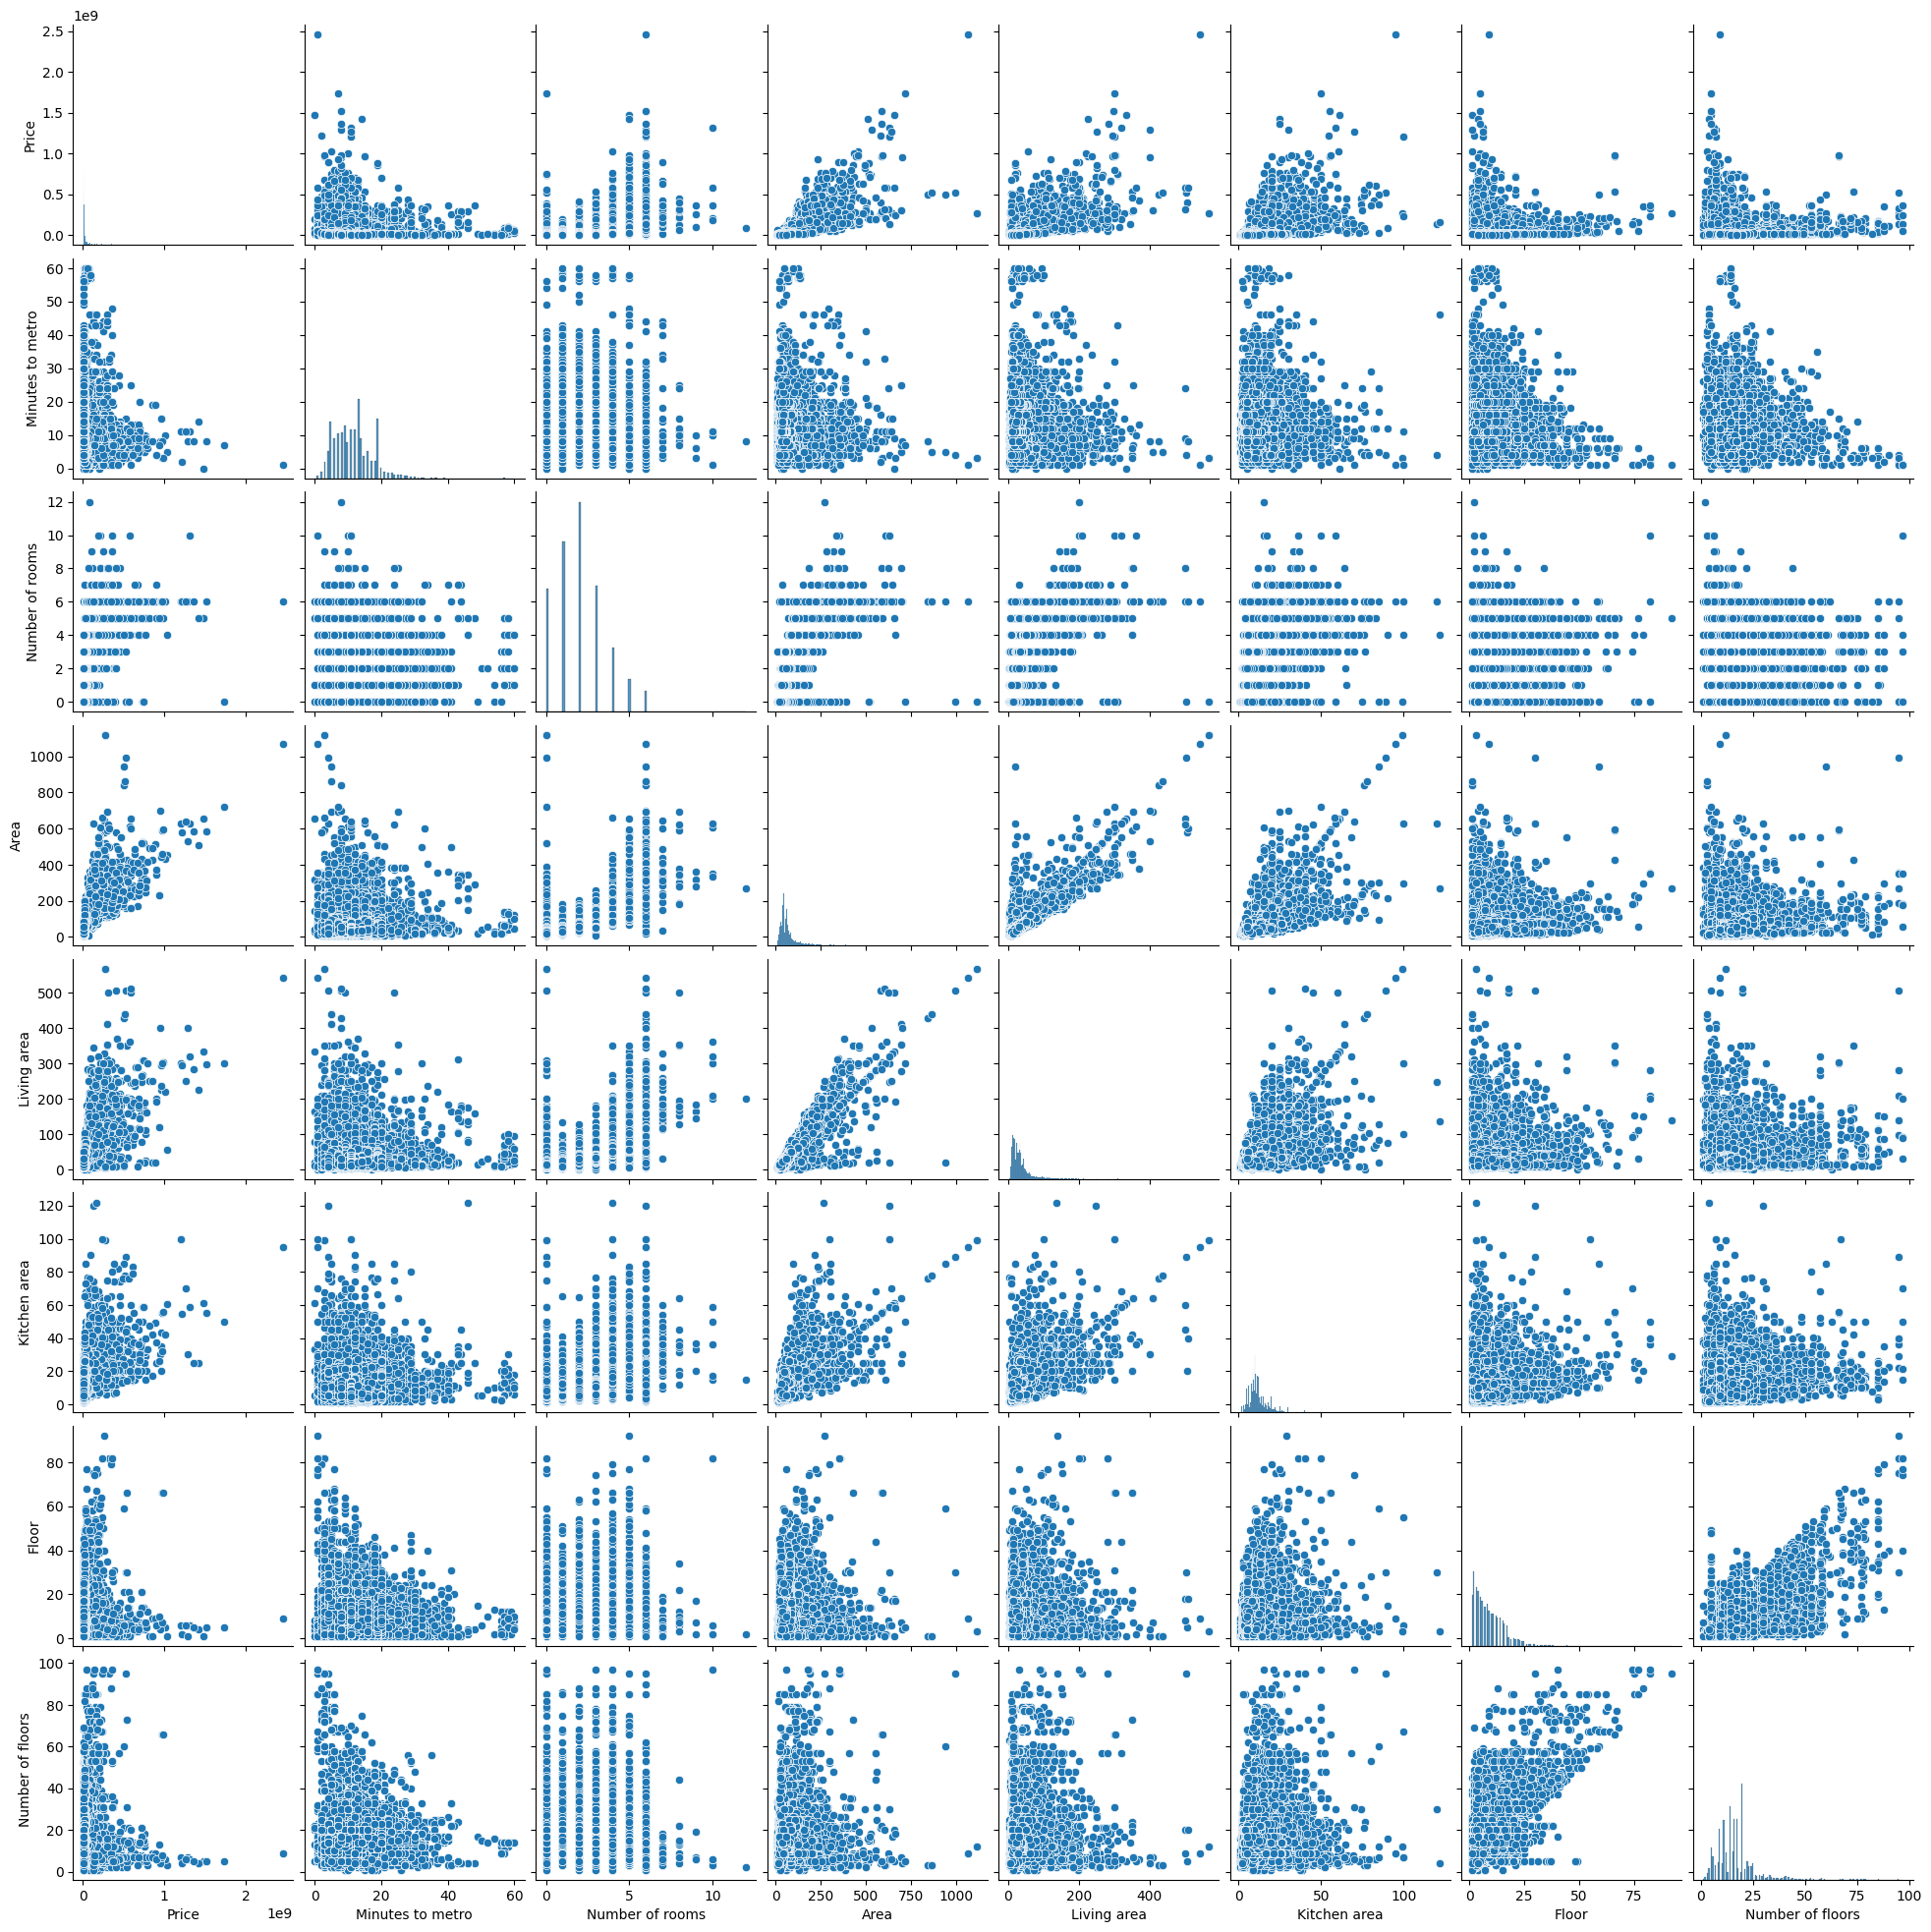

In [ ]:
sns.pairplot(df)

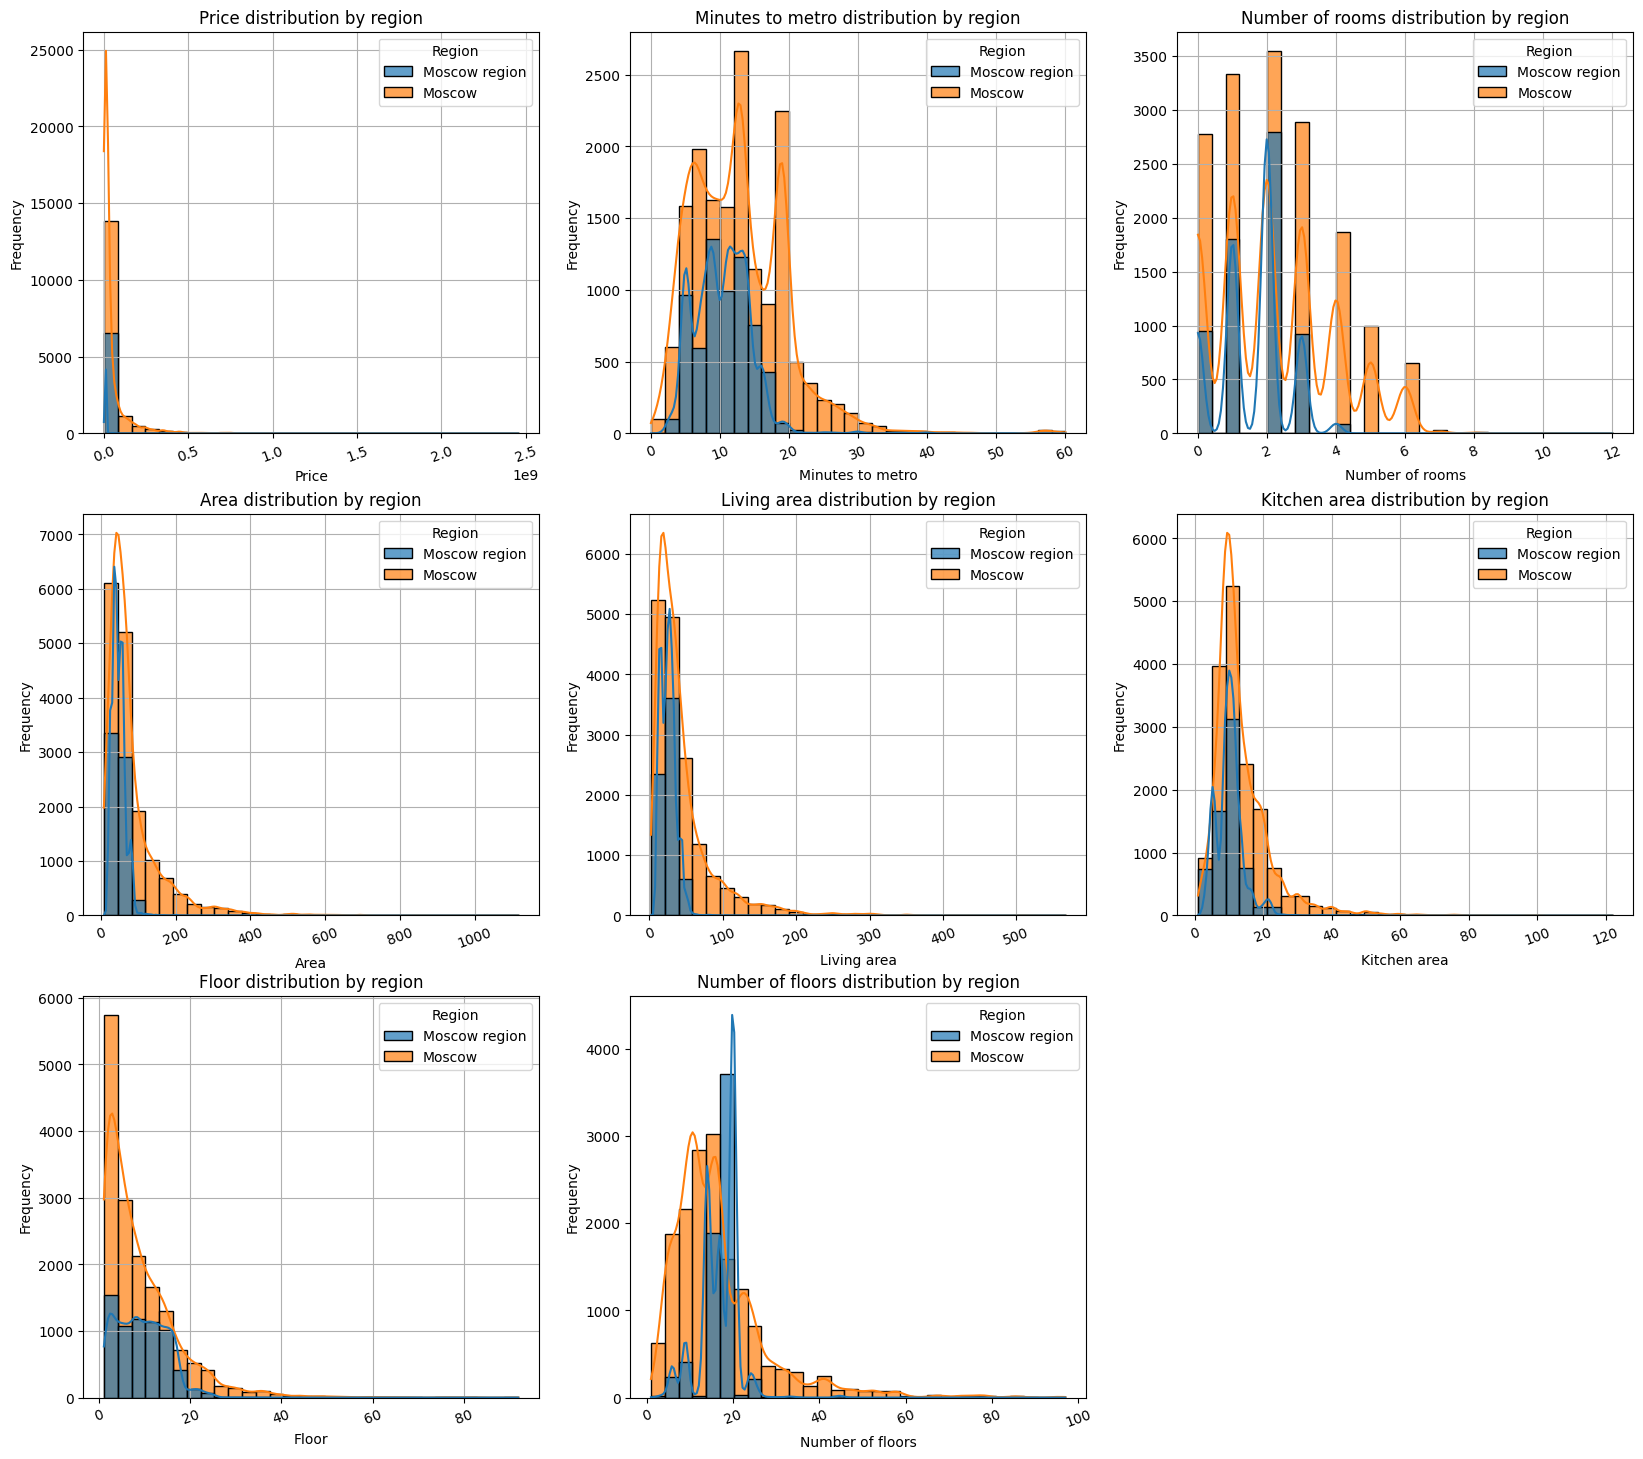

In [ ]:
numeric_cols = df.select_dtypes([int, float]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(20, (num_cols // 3 + 1) * 8))

groups = df.groupby('Region')
for ax, col in zip(axes.flatten(), numeric_cols):
    ax.tick_params(axis='x', labelrotation=20)
    sns.histplot(data=df, x=col, hue='Region', ax=ax, bins=30, alpha=0.7, kde=True)
    ax.set_title(f'{col} distribution by region')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()
for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

Scatterplot (диаграммы рассеяния)

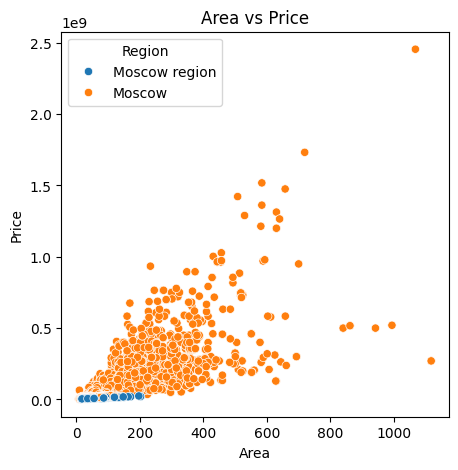

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Area', y='Price', hue='Region')
plt.title('Area vs Price')
plt.show()

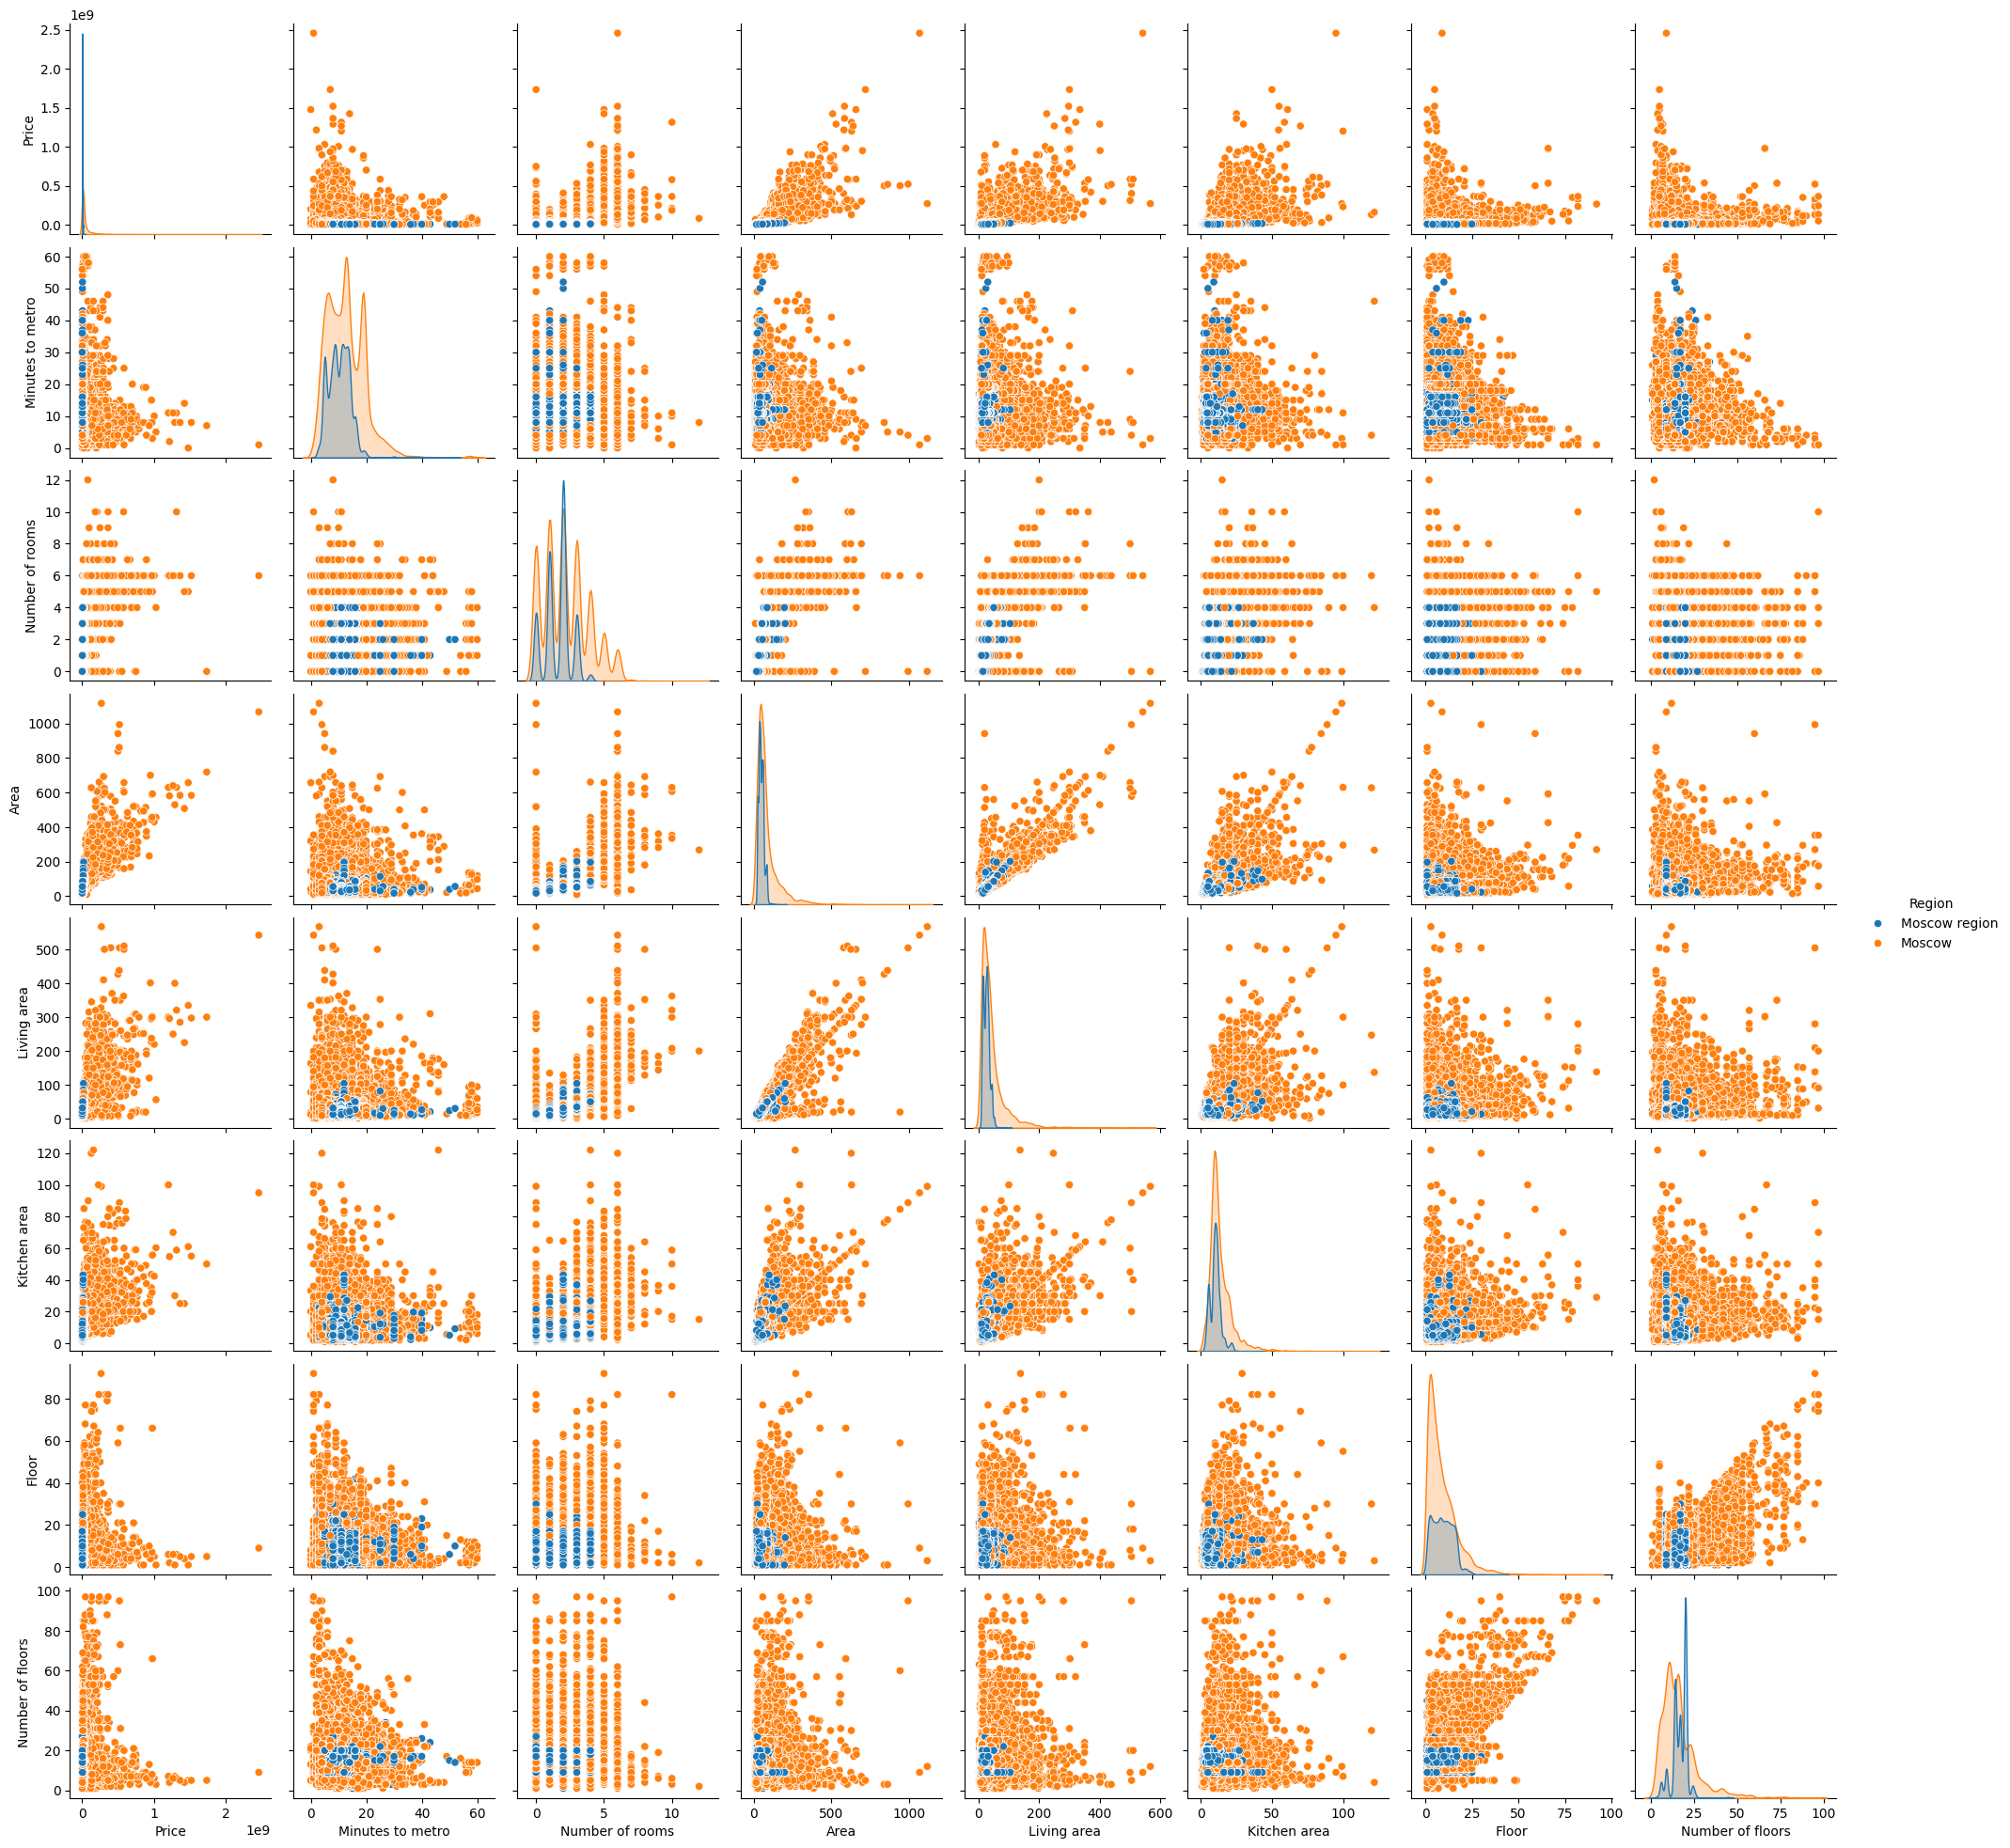

In [ ]:
sns.pairplot(df, hue='Region')

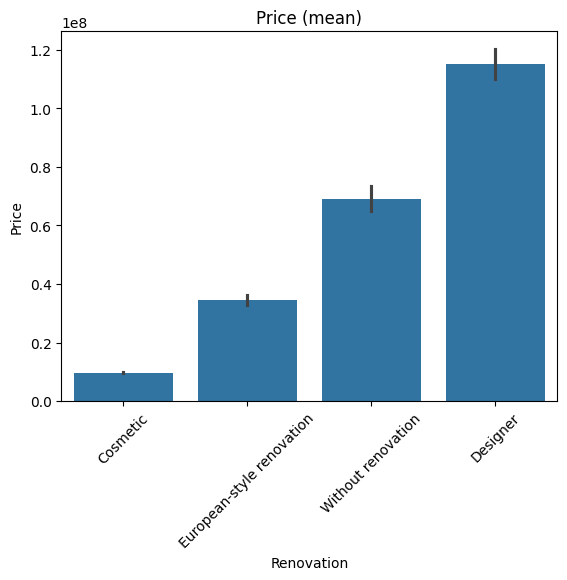

In [ ]:
sns.barplot(df, x='Renovation', y='Price')
plt.xticks(rotation=45)
plt.title('Price (mean)')
plt.show()

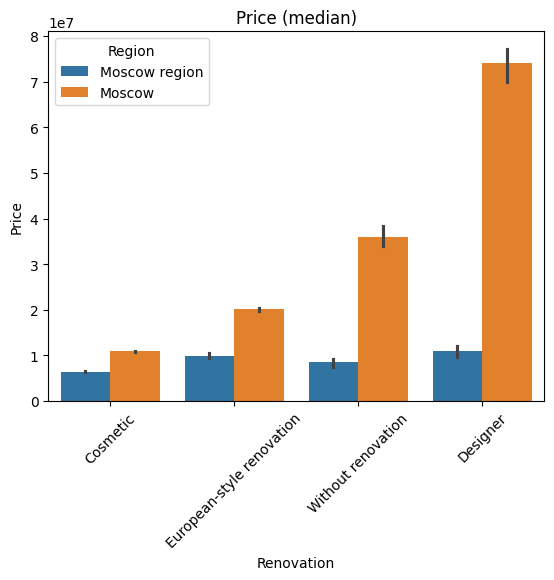

In [ ]:
sns.barplot(df, x='Renovation', y='Price', hue='Region', estimator=np.median)
plt.xticks(rotation=45)
plt.title('Price (median)')
plt.show()

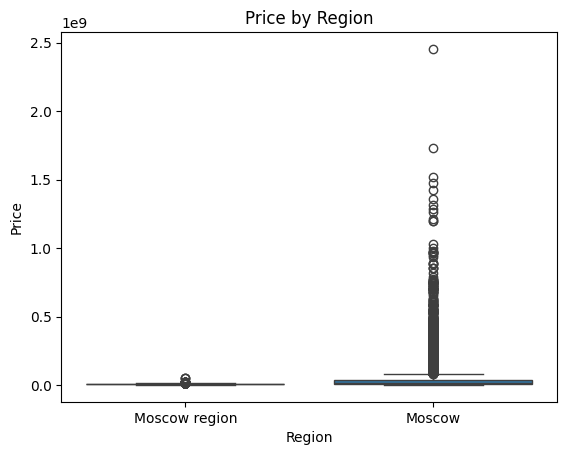

In [ ]:
sns.boxplot(df, y='Price', x='Region')
plt.title('Price by Region')
plt.show()

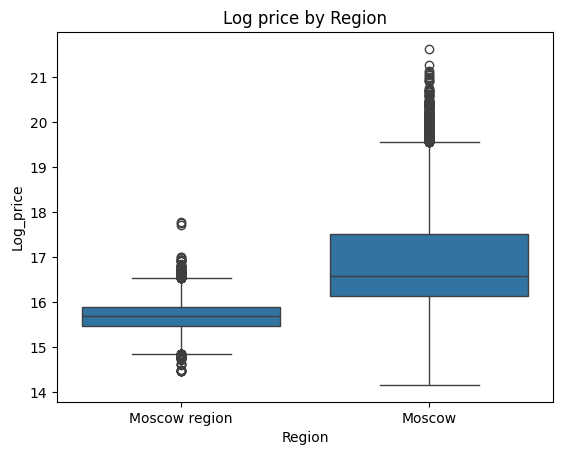

In [ ]:
df['Log_price'] = np.log(df['Price'])
sns.boxplot(df, y='Log_price', x='Region')
plt.title('Log price by Region')
plt.show()
df = df.drop(['Log_price'], axis=1)

In [ ]:
def plot_scatter_and_boxplot(df, x_col, y_col, group_col):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    sns.scatterplot(data=df, x=x_col, y=y_col, hue=group_col, ax=axes[0])
    axes[0].set_title(f'{x_col} vs {y_col}')
    axes[0].set_xlabel(x_col)
    axes[0].set_ylabel(y_col)

    sns.boxplot(data=df, x=group_col, y=x_col, ax=axes[1])
    axes[1].set_title(f'Box Plot {x_col} by {group_col}')
    axes[1].set_xlabel(group_col)
    axes[1].set_ylabel(x_col)

    sns.boxplot(data=df, x=group_col, y=y_col, ax=axes[2])
    axes[2].set_title(f'Box Plot {y_col} by {group_col}')
    axes[2].set_xlabel(group_col)
    axes[2].set_ylabel(y_col)

    plt.tight_layout()
    plt.show()

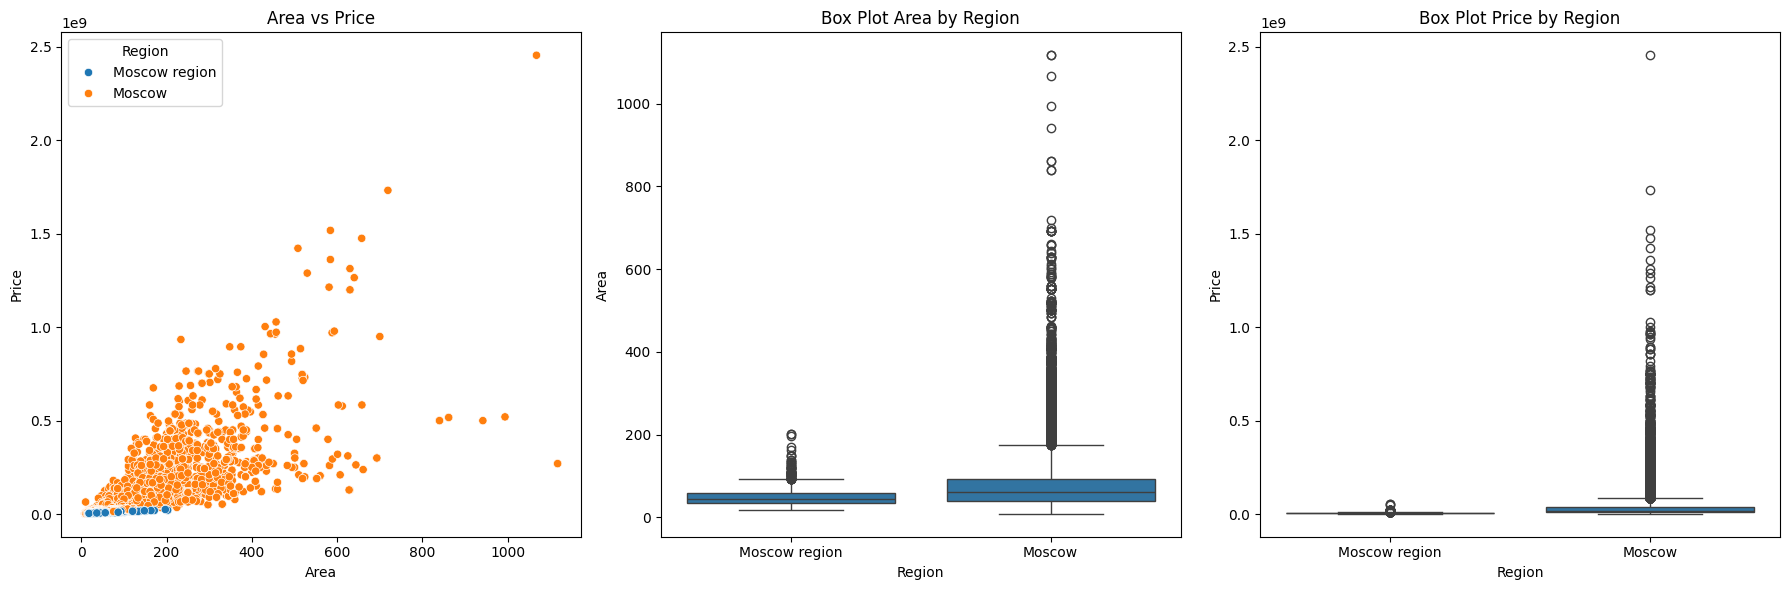

In [ ]:
plot_scatter_and_boxplot(df=df, x_col='Area', y_col='Price', group_col='Region')

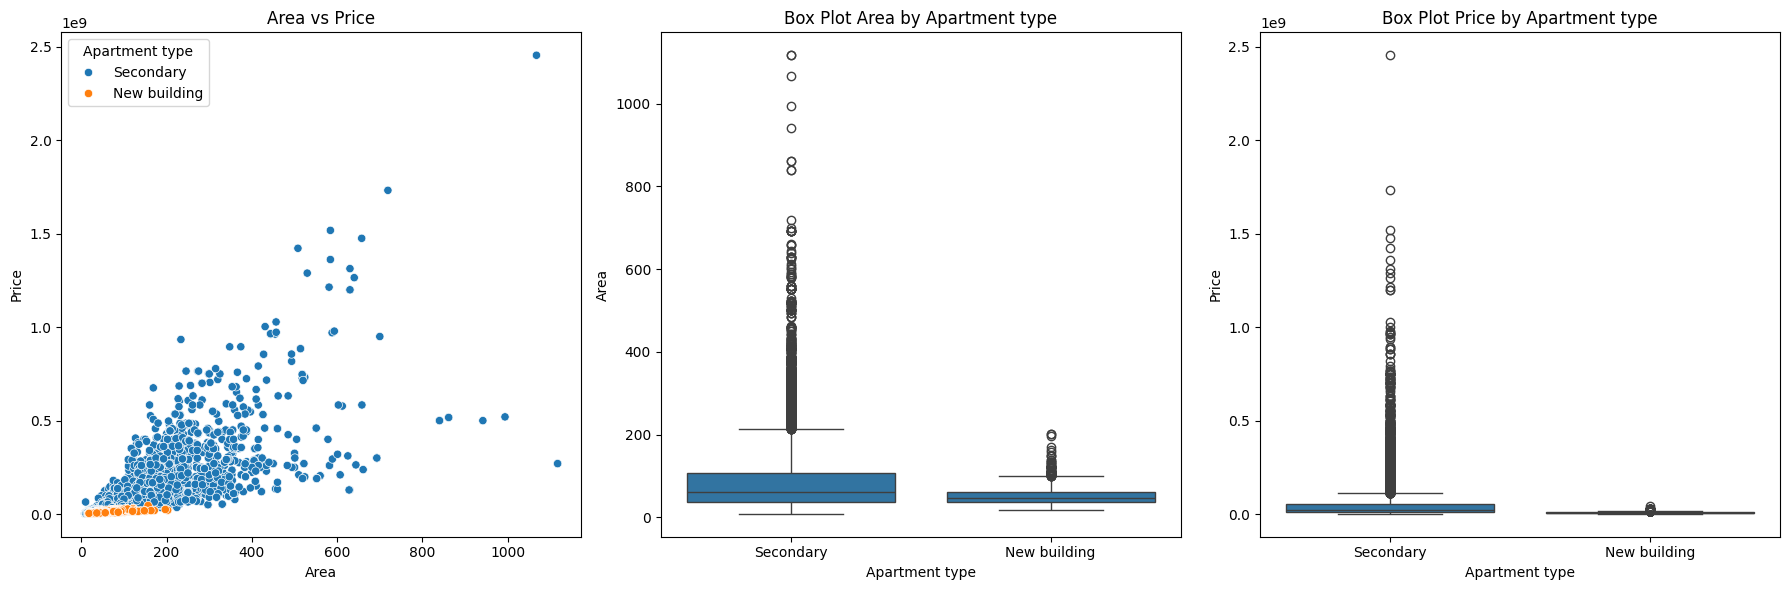

In [ ]:
plot_scatter_and_boxplot(df=df, x_col='Area', y_col='Price', group_col='Apartment type')

А еще есть интерактивные графики!

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = px.scatter(df, x='Price', y='Number of rooms', color='Region',
                 symbol='Renovation',
                 title='Price',
                 labels={'Price': 'Цена', 'Number of rooms': 'Количество комнат'})

fig.update_layout(
    xaxis_title='Цена',
    yaxis_title='Количество комнат',
    legend_title='Регион и Тип ремонта'
)

fig.show()

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.5 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation', 'Log_price'],
      dtype='object')

In [ ]:
from dash import Dash, dcc, html, Input, Output
app = Dash(name = 'Flats')

app.layout = html.Div([
    dcc.Dropdown(
        id='region-dropdown',
        options=[{'label': region, 'value': region} for region in df['Region'].unique()],
        value=df['Region'].unique().tolist(),
        multi=True,
        placeholder="Выберите регион"
    ),
    dcc.Dropdown(
        id='renovation-dropdown',
        options=[{'label': renovation, 'value': renovation} for renovation in df['Renovation'].unique()],
        value=df['Renovation'].unique().tolist(),
        multi=True,
        placeholder="Выберите тип ремонта"
    ),
    dcc.Input(id='min-price', type='number', value=df['Price'].min(), placeholder='Минимальная цена'),
    dcc.Input(id='max-price', type='number', value=df['Price'].max(), placeholder='Максимальная цена'),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('region-dropdown', 'value'),
     Input('renovation-dropdown', 'value'),
     Input('min-price', 'value'),
     Input('max-price', 'value')]
)
def update_graph(selected_regions, selected_renovations, min_price, max_price):
    filtered_df = df[(df['Region'].isin(selected_regions))
     & (df['Renovation'].isin(selected_renovations))
      & (df['Price'].between(min_price, max_price))]
    fig = px.scatter(filtered_df, x='Area', y='Price', color='Region', hover_data=filtered_df.columns)
    fig.update_layout(
        title='Price of flats',
        xaxis_title='Area',
        yaxis_title='Price'
    )

    return fig

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Но мы увлеклись, вернемся к цели!

### Часть 3. Корреляция и регрессия

Посмотрим корреляции с числовыми переменными. Для этого используем коэффициент корреляции Пирсона.

<center><b>Correlation is not Causation!</b></center>

In [ ]:
df.corr(numeric_only=True)

Price  Minutes to metro  Number of rooms  Area  Living area  \
Price              1.00             -0.11             0.49  0.79         0.71   
Minutes to metro  -0.11              1.00            -0.08 -0.09        -0.09   
Number of rooms    0.49             -0.08             1.00  0.69         0.66   
Area               0.79             -0.09             0.69  1.00         0.91   
Living area        0.71             -0.09             0.66  0.91         1.00   
Kitchen area       0.58             -0.06             0.48  0.73         0.61   
Floor              0.02              0.02             0.09  0.08         0.07   
Number of floors  -0.02             -0.03             0.07  0.04         0.04   

                  Kitchen area  Floor  Number of floors  
Price                     0.58   0.02             -0.02  
Minutes to metro         -0.06   0.02             -0.03  
Number of rooms           0.48   0.09              0.07  
Area                      0.73   0.08              0.04  
Living area               0.61   0.07              0.04  
Kitchen area              1.00   0.13              0.11  
Floor                     0.13   1.00              0.60  
Number of floors          0.11   0.60              1.00

<Axes: >

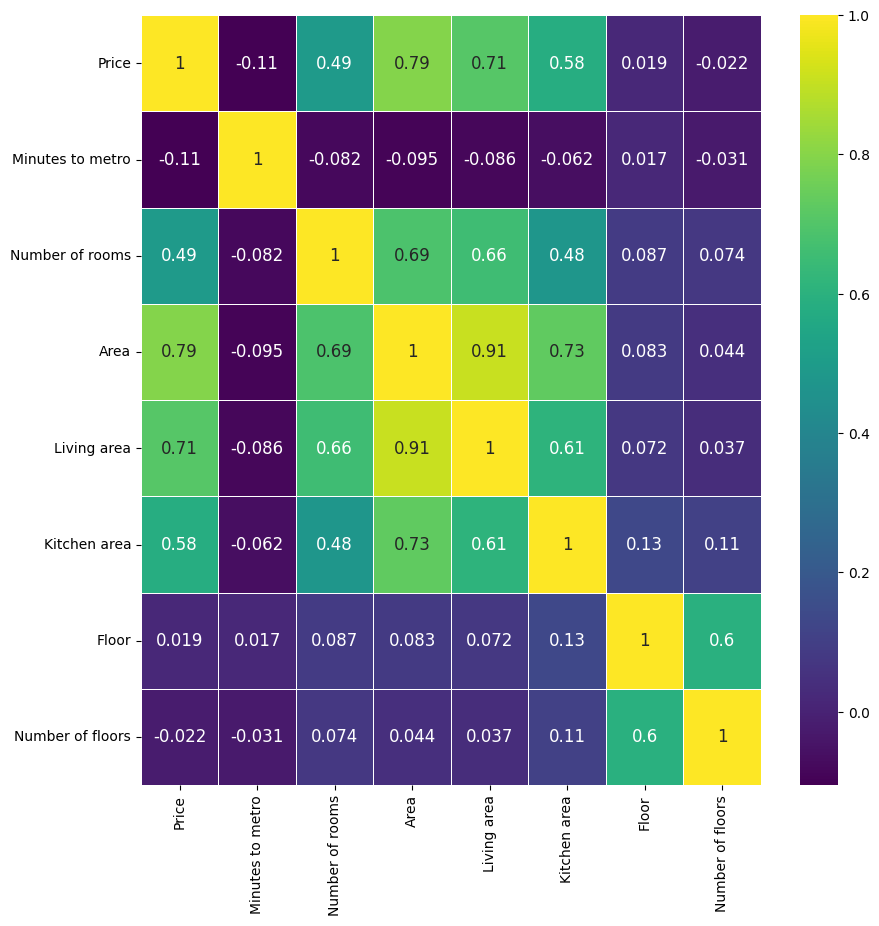

In [ ]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})


Строим линейную регрессию (предполагаем, что цена линейно зависит от других факторов):

$$ price = w_0 + w_1*area + w_2*minutes\_to\_metro + w_3*Floor + ...$$

Во время обучения подбираются веса $w_0$, $w_1$.... Подбор весов происходит за счёт минимизации разности между реальными значениями и предсказанными.

___

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df.select_dtypes(['object']).head()

Apartment type Metro station         Region                 Renovation
0      Secondary       Опалиха  Moscow region                   Cosmetic
1      Secondary       Павшино  Moscow region  European-style renovation
2      Secondary      Мякинино  Moscow region                   Cosmetic
3      Secondary      Строгино  Moscow region  European-style renovation
4      Secondary       Опалиха  Moscow region         Without renovation

In [ ]:
df_1 = df.select_dtypes([int, float])
X = df_1.drop('Price', axis=1)
y = df_1['Price']

In [ ]:
y

0        6,300,000.00
1        9,000,000.00
2       11,090,000.00
3        8,300,000.00
4        6,450,000.00
             ...     
22671    4,768,792.00
22672    5,900,000.00
22673    3,700,000.00
22674    5,768,869.00
22675    6,839,157.00
Name: Price, Length: 22675, dtype: float64

In [ ]:
X.columns

Index(['Minutes to metro', 'Number of rooms', 'Area', 'Living area',
       'Kitchen area', 'Floor', 'Number of floors'],
      dtype='object')

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
lr.coef_

array([ -418564.43593561, -5576835.33677255,  1048790.36785245,
         -25690.77491617,   258628.07947982,  -268341.82936377,
        -396971.0588855 ])

In [ ]:
X.head()

Minutes to metro  Number of rooms  Area  Living area  Kitchen area  Floor  \
0              6.00                1 30.60        11.10          8.50     25   
1              2.00                1 49.20        20.00         10.00      6   
2             14.00                1 44.70        16.20         13.10     10   
3              8.00                1 35.10        16.00         11.00     12   
4              6.00                1 37.70        15.20          4.00      5   

   Number of floors  
0                25  
1                15  
2                25  
3                33  
4                 5

In [ ]:
pred_train = lr.predict(train_x)
root_mean_squared_error(train_y, pred_train)

49339813.95356221

In [ ]:
pred_test = lr.predict(test_x)
root_mean_squared_error(test_y, pred_test)

50592832.894424826

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaler = scaler.transform(train_x)
test_x_scaler = scaler.transform(test_x)

lr2 = LinearRegression()
lr2.fit(train_x_scaler, train_y)
pred2 = lr2.predict(test_x_scaler)
round(root_mean_squared_error(test_y, pred2), 5)

50592832.89442

In [ ]:
train_y

19250    9,607,670.00
3008     5,712,000.00
11550    8,200,000.00
14726   10,560,400.00
19774    7,461,967.00
             ...     
11964    5,100,000.00
21576   26,010,627.00
5390    13,300,000.00
860     99,000,000.00
15796   11,786,250.00
Name: Price, Length: 17006, dtype: float64

In [ ]:
def remove_outliers(data, y, col, is_target = False):
    column = data[col] if not is_target else y
    IQR = column.quantile(0.75) - column.quantile(0.25)
    h = column.quantile(0.75) + 1.5 * IQR
    l =column.quantile(0.25) - 1.5 * IQR
    return data[column.between(l, h)], y[column.between(l, h)]

In [ ]:
train_x, train_y = remove_outliers(train_x, train_y, 'Price', is_target=True)
train_x, train_y = remove_outliers(train_x, train_y, 'Area')

In [ ]:
lr3 = LinearRegression()
lr3.fit(train_x, train_y)
pred_test = lr3.predict(test_x)
root_mean_squared_error(test_y, pred_test)

71109525.47660086

In [ ]:
df_with_cat = pd.get_dummies(df, columns =['Apartment type', 'Region', 'Renovation'])

In [ ]:
df['Region'].unique()

array(['Moscow region', 'Moscow'], dtype=object)

In [ ]:
df_with_cat.head()

Price Metro station  Minutes to metro  Number of rooms  Area  \
0  6,300,000.00       Опалиха              6.00                1 30.60   
1  9,000,000.00       Павшино              2.00                1 49.20   
2 11,090,000.00      Мякинино             14.00                1 44.70   
3  8,300,000.00      Строгино              8.00                1 35.10   
4  6,450,000.00       Опалиха              6.00                1 37.70   

   Living area  Kitchen area  Floor  Number of floors  \
0        11.10          8.50     25                25   
1        20.00         10.00      6                15   
2        16.20         13.10     10                25   
3        16.00         11.00     12                33   
4        15.20          4.00      5                 5   

   Apartment type_New building  Apartment type_Secondary  Region_Moscow  \
0                        False                      True          False   
1                        False                      True          False   
2                        False                      True          False   
3                        False                      True          False   
4                        False                      True          False   

   Region_Moscow region  Renovation_Cosmetic  Renovation_Designer  \
0                  True                 True                False   
1                  True                False                False   
2                  True                 True                False   
3                  True                False                False   
4                  True                False                False   

   Renovation_European-style renovation  Renovation_Without renovation  
0                                 False                          False  
1                                  True                          False  
2                                 False                          False  
3                                  True                          False  
4                                 False                           True

In [ ]:
df_4 = df_with_cat.copy()
X = df_4.drop('Price', axis=1)
y = df_4['Price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
mean_enc = pd.concat([train_x, train_y], axis=1).groupby('Metro station')['Price'].mean()
train_x['metro_m_enc'] = train_x['Metro station'].map(mean_enc)
train_x.head()

Metro station  Minutes to metro  Number of rooms  Area  \
19250          Зябликово              9.00                3 83.80   
3008     Пятницкое шоссе             25.00                0 20.40   
11550        Филатов Луг             15.00                0 21.50   
14726        Москворечье             10.00                2 43.71   
19774  Красногвардейская             16.00                3 61.67   

       Living area  Kitchen area  Floor  Number of floors  \
19250        44.50         13.60     11                14   
3008         17.00          8.30      2                 9   
11550        10.00          5.00      8                18   
14726        24.80          6.80     23                30   
19774        35.40          5.80      8                20   

       Apartment type_New building  Apartment type_Secondary  Region_Moscow  \
19250                         True                     False          False   
3008                         False                      True           True   
11550                        False                      True           True   
14726                         True                     False           True   
19774                         True                     False          False   

       Region_Moscow region  Renovation_Cosmetic  Renovation_Designer  \
19250                  True                 True                False   
3008                  False                False                False   
11550                 False                False                False   
14726                 False                 True                False   
19774                  True                 True                False   

       Renovation_European-style renovation  Renovation_Without renovation  \
19250                                 False                          False   
3008                                   True                          False   
11550                                  True                          False   
14726                                 False                          False   
19774                                 False                          False   

        metro_m_enc  
19250  8,649,842.78  
3008   6,561,797.50  
11550 12,545,666.60  
14726 12,761,842.58  
19774  6,147,331.93

In [ ]:
test_x['metro_m_enc'] = test_x['Metro station'].map(mean_enc).fillna(train_y.median())

In [ ]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5669 entries, 11862 to 9237
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Metro station                         5669 non-null   object 
 1   Minutes to metro                      5669 non-null   float64
 2   Number of rooms                       5669 non-null   int64  
 3   Area                                  5669 non-null   float64
 4   Living area                           5669 non-null   float64
 5   Kitchen area                          5669 non-null   float64
 6   Floor                                 5669 non-null   int64  
 7   Number of floors                      5669 non-null   int64  
 8   Apartment type_New building           5669 non-null   bool   
 9   Apartment type_Secondary              5669 non-null   bool   
 10  Region_Moscow                         5669 non-null   bool   
 11  Region_Moscow regi

In [ ]:
test_x[test_x['metro_m_enc'].isnull()].head()

Empty DataFrame
Columns: [Metro station, Minutes to metro, Number of rooms, Area, Living area, Kitchen area, Floor, Number of floors, Apartment type_New building, Apartment type_Secondary, Region_Moscow, Region_Moscow region, Renovation_Cosmetic, Renovation_Designer, Renovation_European-style renovation, Renovation_Without renovation, metro_m_enc]
Index: []

In [ ]:
test_x[test_x['metro_m_enc'].isnull()]['Metro station'].unique()

array([], dtype=object)

In [ ]:
train_x[train_x['Metro station'] == 'Орехово']

Metro station  Minutes to metro  Number of rooms  Area  Living area  \
6220        Орехово              3.00                2 51.00        31.00   
9452        Орехово             11.00                3 60.00        42.50   
7470        Орехово              8.00                2 53.00        32.00   
11616       Орехово              4.00                0  9.20         6.80   
12017       Орехово              6.00                0 10.00         7.20   
7034        Орехово              3.00                2 50.90        30.50   
8298        Орехово              7.00                3 56.60        37.50   
12171       Орехово              6.00                0 10.20         7.30   
11703       Орехово              6.00                0 10.20         7.30   
11533       Орехово             20.00                0 26.70        18.80   
20495       Орехово              8.00                1 38.00        15.70   
12096       Орехово              6.00                0 10.40         7.40   
12208       Орехово             10.00                0 16.00        10.20   
12236       Орехово              6.00                0 23.90        14.20   

       Kitchen area  Floor  Number of floors  Apartment type_New building  \
6220           9.00      6                17                        False   
9452           6.00      9                 9                        False   
7470           9.00      1                12                        False   
11616          7.40      1                17                        False   
12017          7.50      1                 9                        False   
7034           8.20     13                17                        False   
8298           6.00      9                 9                        False   
12171          7.50      1                 9                        False   
11703          7.50      1                 9                        False   
11533          4.00     17                22                        False   
20495         10.00     10                12                         True   
12096          7.50      1                 9                        False   
12208          8.00      1                 9                        False   
12236          8.60      1                 9                        False   

       Apartment type_Secondary  Region_Moscow  Region_Moscow region  \
6220                       True           True                 False   
9452                       True           True                 False   
7470                       True           True                 False   
11616                      True           True                 False   
12017                      True           True                 False   
7034                       True           True                 False   
8298                       True           True                 False   
12171                      True           True                 False   
11703                      True           True                 False   
11533                      True           True                 False   
20495                     False          False                  True   
12096                      True           True                 False   
12208                      True           True                 False   
12236                      True           True                 False   

       Renovation_Cosmetic  Renovation_Designer  \
6220                  True                False   
9452                 False                False   
7470                  True                False   
11616                 True                False   
12017                 True                False   
7034                 False                False   
8298                  True                False   
12171                 True                False   
11703                 True                False   
11533                False                False   
20495                 True                False   
1

In [ ]:
train_x = train_x.drop(['Metro station'], axis=1)
test_x = test_x.drop(['Metro station'], axis=1)

In [ ]:
lr4 = LinearRegression()
lr4.fit(train_x, train_y)
pred_test = lr4.predict(test_x)
root_mean_squared_error(test_y, pred_test)

45600705.07705634

In [ ]:
df[df['Metro station'].str.contains('виамоторная')]['Metro station'].unique()

array([' Авиамоторная', 'Авиамоторная'], dtype=object)

In [ ]:
df['Metro station'] = df['Metro station'].str.strip()
df_with_cat = pd.get_dummies(df, columns =['Apartment type', 'Region', 'Renovation'])
df_5 = df_with_cat.copy()
X = df_5.drop('Price', axis=1)
y = df_5['Price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
mean_enc = pd.concat([train_x, train_y], axis=1).groupby('Metro station')['Price'].mean()
train_x['metro_m_enc'] = train_x['Metro station'].map(mean_enc)
test_x['metro_m_enc'] = test_x['Metro station'].map(mean_enc).fillna(train_y.median())
train_x = train_x.drop(['Metro station'], axis=1)
test_x = test_x.drop(['Metro station'], axis=1)

In [ ]:
lr5 = LinearRegression()
lr5.fit(train_x, train_y)
pred_test = lr5.predict(test_x)
root_mean_squared_error(test_y, pred_test)

45485611.28749844

In [ ]:
df['Metro station'] = df['Metro station'].str.strip()
df_with_cat = pd.get_dummies(df, columns =['Apartment type', 'Region', 'Renovation'])
df_6 = df_with_cat.drop(['Floor'], axis=1)
X = df_6.drop('Price', axis=1)
y = df_6['Price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
mean_enc = pd.concat([train_x, train_y], axis=1).groupby('Metro station')['Price'].mean()
train_x['metro_m_enc'] = train_x['Metro station'].map(mean_enc)
test_x['metro_m_enc'] = test_x['Metro station'].map(mean_enc).fillna(train_y.median())
train_x = train_x.drop(['Metro station'], axis=1)
test_x = test_x.drop(['Metro station'], axis=1)

In [ ]:
lr6 = LinearRegression()
lr6.fit(train_x, train_y)
pred_test = lr6.predict(test_x)
root_mean_squared_error(test_y, pred_test)

45483627.22210726